<a href="https://colab.research.google.com/github/jeftersantiago/intro_ciencia_de_dados/blob/master/Tarefa%204%20-%20Regressao%20Logistica%20e%20KNN/Tarefa%204%20-%20Regressao%20Logistica%20e%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from mlxtend.plotting import plot_decision_regions
import sklearn.datasets as skdata
from pandas import DataFrame

# Exercício 1
Considere as bases Iris e Vehicle. Em um mesmo gráfico, mostre a acurácia em função de k para o método k-vizinhos.

## Base Iris

In [ ]:
def prepare_data(path): 
  data = pd.read_csv(path, header = (0))

  data = data.dropna(axis = 'rows')
  classes = np.array(pd.unique(data[data.columns[-1]]), dtype = str)

  nrow, ncol = data.shape

  attributes = list(data.columns)

  data = data.to_numpy()
  nrow,ncol = data.shape
  y = data[:,-1]
  X = data[:,0:ncol-1]
  scaler = StandardScaler().fit(X)
  X = scaler.transform(X)
  return X, y

In [ ]:
X_iris, y_iris = prepare_data("/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/data/iris.csv")
X_vehicle, y_vehicle = prepare_data("/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/data/Vehicle.csv")

In [ ]:
p = 0.7 
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, train_size = p, random_state = 42)
x_train_vehicle, x_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(X_vehicle, y_vehicle, train_size = p, random_state = 42)

In [ ]:
def accuracy(x_train, y_train):
  k = 5
  nkf = 5
  vk = [] 
  vscore = []
  for k in range(1, 20):
      model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
      # realiza a validação cruzada
      cv = cross_validate(model, x_train, y_train, cv=nkf)
      #print('k:', k, 'accurace:', cv['test_score'].mean())
      vscore.append(cv['test_score'].mean()) 
      vk.append(k)
  return vscore, vk

vscore_iris, vk_iris = accuracy(x_train_iris, y_train_iris)
vscore_vehicle, vk_vehicle = accuracy(x_train_vehicle, y_train_vehicle)

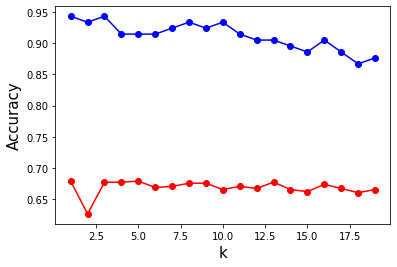

[IRIS] Melhor k: 1
[VEHICLE] Melhor k: 5


In [ ]:
plt.plot(vk_iris, vscore_iris, '-bo', color = 'blue', label = 'Iris')
plt.plot(vk_vehicle, vscore_vehicle, '-bo', color = 'red', label = 'Vehicle')

plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

best_k_iris = np.argmax(vscore_iris)+1
best_k_vehicle = np.argmax(vscore_vehicle)+1

print('[IRIS] Melhor k:', best_k_iris)
print('[VEHICLE] Melhor k:', best_k_vehicle)

In [ ]:
def predict(best_k, x_train, x_test, y_train, y_test):
  model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return accuracy_score(y_pred, y_test)

print('[IRIS] Accuracy:', predict(best_k_iris, x_train_iris, x_test_iris, y_train_iris, y_test_iris))
print('[VEHICLE] Accuracy:', predict(best_k_vehicle, x_train_vehicle, x_test_vehicle, y_train_vehicle, y_test_vehicle))

[IRIS] Accuracy: 0.9777777777777777
[VEHICLE] Accuracy: 0.7677165354330708


# Exercício 2
Considere os dados gerados com o código abaixo e obtenha as regiões de separação usando o método k-vizinhos para diferentes valores de k. Compare com as regiões obtidas usando o método regressão logística.

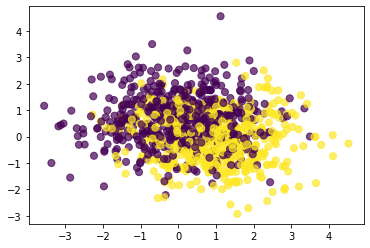

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show()

## Regiões encontradas usando o KNN

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


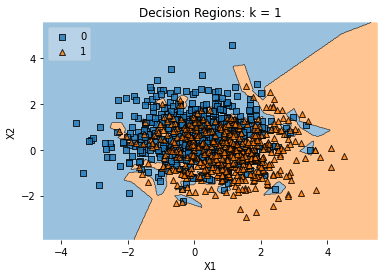

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


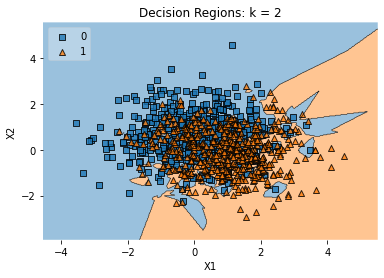

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


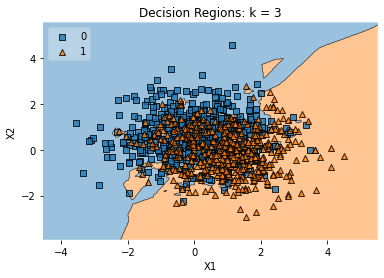

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


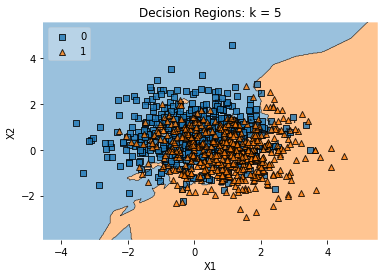

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


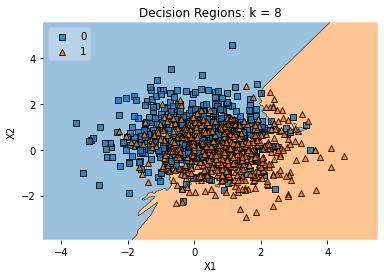

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


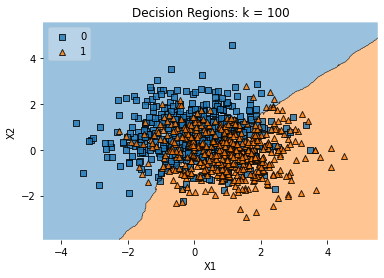

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


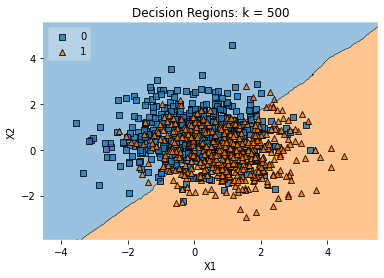

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


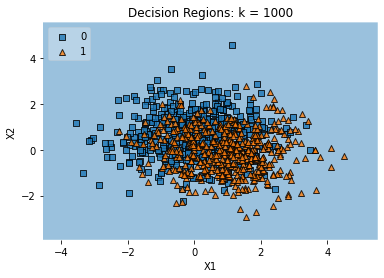

In [ ]:
ks = [1, 2, 3, 5, 8, 100, int(n_samples/2), n_samples]

for k in ks:

    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)

    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = ' + str(k))

    plt.show()

## Regiões encontradas usando a regressão logística

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


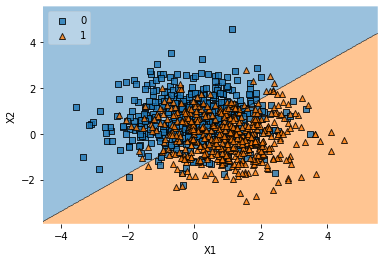

In [ ]:

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)

# Plotting decision regions

plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

A região descrita pela regressão logística é quase uma reta, a região descrita pelo KNN se adapta para cada escolha de $N$, porém, note que para $N$ muito grande a região descrita pelo KNN é a mais parecida com a da regressão logística. Isso acontece porque o número de k de vizinhos é muito grande (metade da quantidade total de pontos).

# Exercício 3
Classifique as bases Iris e Vehicle usando regressão logística e compare com o método kvizinhos.

In [ ]:
X_vehicle, y_vehicle = prepare_data("/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/data/Vehicle.csv")

In [ ]:
def logisticRegression(X, y):

  p = 0.2

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 1533)
  
  model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  return model.score(x_test, y_test)

In [ ]:
acc_vehicle = logisticRegression(X_vehicle, y_vehicle)
acc_iris = logisticRegression(X_iris, y_iris)

In [ ]:
print("[IRIS] Acurácia = ", acc_iris)
print("[VEHICLE] Acurácia = ", acc_vehicle)

[IRIS] Acurácia =  0.9666666666666667
[VEHICLE] Acurácia =  0.7823529411764706


O método KNN para a base Íris se mostra melhor, em relação a precisão para a base Vehicle a regressão logística apresenta mehor precisão.